In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load training/test data for closed-world scenario
print("Loading data...")

BASE_PATH = "/content/drive/MyDrive/ML_Dataset"

try:
    X_train = np.load(f"{BASE_PATH}/X_train_cw.npy")
    X_test  = np.load(f"{BASE_PATH}/X_test_cw.npy")
    y_train = np.load(f"{BASE_PATH}/y_train_cw.npy")
    y_test  = np.load(f"{BASE_PATH}/y_test_cw.npy")

    print("✅ Data loaded successfully!")
    print(f"X_train: {X_train.shape} | y_train: {y_train.shape}")
    print(f"X_test : {X_test.shape}  | y_test : {y_test.shape}")

except FileNotFoundError as e:
    print(f"오류: 파일을 찾을 수 없습니다. 경로를 확인해주세요. ({e})")
    raise

# Random Forest Model Training
print("\nTraining Random Forest model...")

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
print("Training complete.")

Loading data...
✅ Data loaded successfully!
X_train: (14250, 25) | y_train: (14250,)
X_test : (4750, 25)  | y_test : (4750,)

Training Random Forest model...
Training complete.


In [5]:
print("\nEvaluating model...")

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix shape:", cm.shape)



Evaluating model...
Accuracy: 0.8398

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82        50
           1       0.88      0.90      0.89        50
           2       0.96      0.94      0.95        50
           3       0.86      0.88      0.87        50
           4       0.79      0.96      0.86        50
           5       0.84      0.84      0.84        50
           6       0.90      0.86      0.88        50
           7       0.81      0.92      0.86        50
           8       0.84      0.76      0.80        50
           9       0.77      0.88      0.82        50
          10       0.93      0.82      0.87        50
          11       0.90      0.86      0.88        50
          12       0.87      0.96      0.91        50
          13       0.74      0.68      0.71        50
          14       0.81      0.86      0.83        50
          15       0.66      0.90      0.76        50
          16       

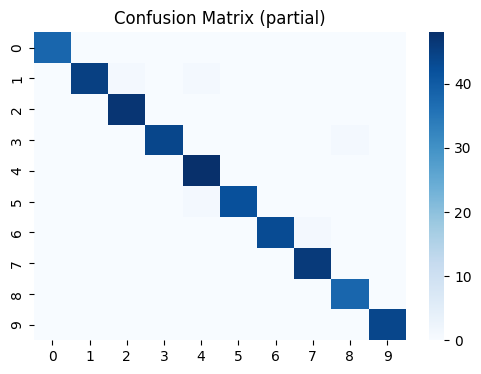

In [6]:
#Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm[:10, :10], cmap="Blues")
plt.title("Confusion Matrix (partial)")
plt.show()